# Diabetes analysis
Data analysis based on diabetes.csv downloaded from Kaggle. <br>
Data source: https://www.kaggle.com/uciml/pima-indians-diabetes-database


Diabetes is a metabolic disorder characterising in high glucose level in blood. It results from wrong insulin production or its wrong metabolism in cells. 

The goal of this analysis is to create a model which would predict if the person has diabetes or not based on some blood and person's parameters.

# Import and prepare the data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('FILES/diabetes.csv', sep=',')
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
366,6,124,72,0,0,27.6,0.368,29,1
31,3,158,76,36,245,31.6,0.851,28,1
637,2,94,76,18,66,31.6,0.649,23,0
400,4,95,64,0,0,32.0,0.161,31,1
703,2,129,0,0,0,38.5,0.304,41,0
167,4,120,68,0,0,29.6,0.709,34,0
627,0,132,78,0,0,32.4,0.393,21,0
259,11,155,76,28,150,33.3,1.353,51,1
65,5,99,74,27,0,29.0,0.203,32,0
142,2,108,52,26,63,32.5,0.318,22,0


The code above simply reads the .csv file and stores the data in data variable. Now let's take a look on the data and count NaNs or 0 values.

In [2]:
# describing the dataset
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
# checking information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# checking null values
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# checking how many of each columns are 0's
for c in data.columns:
    print(c + ': ' + str(data[data[c] == 0][c].count()))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


There can be women with no pregnancies, but data for Glucose, BloodPressure, SkinThickness, Insulin and BMI is incomplete.<br>Now let's see how many patients did have diabetes.

In [6]:
# outcome count:
data['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

OK, so now we know that 65% of dataset did not have diabetes against 35% who had. I assume that people who had diabetes have different values of parameters than people who did not have it. That is why I change 0's with median for corresponding value for one dataset. Second one, I will keep as dataset excluding NaN's values. I will need it for further analysis.

In [7]:
# changing 0's to NaN so that they do not change the median value
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data[c].replace(0, np.NaN, inplace=True)

In [8]:
# prepare dataset with no NaN's - needed for further investigations
# removing SkinThickness and Insulin from further analysis with no NaNs as the amount of data to exclude would be too high 
# (374 out of 768 rows)
data_no_nans = data[['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']]
data_no_nans = data_no_nans.dropna()
data_no_nans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 724 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    int64  
 6   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 45.2 KB


In [9]:
# check if correct number of cells has been changed
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# how it looks in dataframe
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
515,3,163.0,70.0,18.0,105.0,31.6,0.268,28,1
450,1,82.0,64.0,13.0,95.0,21.2,0.415,23,0
575,1,119.0,44.0,47.0,63.0,35.5,0.280,25,0
313,3,113.0,50.0,10.0,85.0,29.5,0.626,25,0
403,9,72.0,78.0,25.0,NaN,31.6,0.280,38,0
389,3,100.0,68.0,23.0,81.0,31.6,0.949,28,0
419,3,129.0,64.0,29.0,115.0,26.4,0.219,28,1
433,2,139.0,75.0,NaN,NaN,25.6,0.167,29,0
620,2,112.0,86.0,42.0,160.0,38.4,0.246,28,0
25,10,125.0,70.0,26.0,115.0,31.1,0.205,41,1


In [11]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
1,4.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


In [12]:
# change NaN's to corresponding median
for c in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    data.loc[(data['Outcome'] == 0) & (data[c].isnull()), c] = data[data['Outcome'] == 0][c].median() 
    data.loc[(data['Outcome'] == 1) & (data[c].isnull()), c] = data[data['Outcome'] == 1][c].median() 
data.isnull().sum()             

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
# print actual medians grouped by outcome
data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,27.0,102.5,30.1,0.336,27.0
1,4.0,140.0,74.5,32.0,169.5,34.3,0.449,36.0


# Data visualization

## Visualization for data with NaNs changed to medians

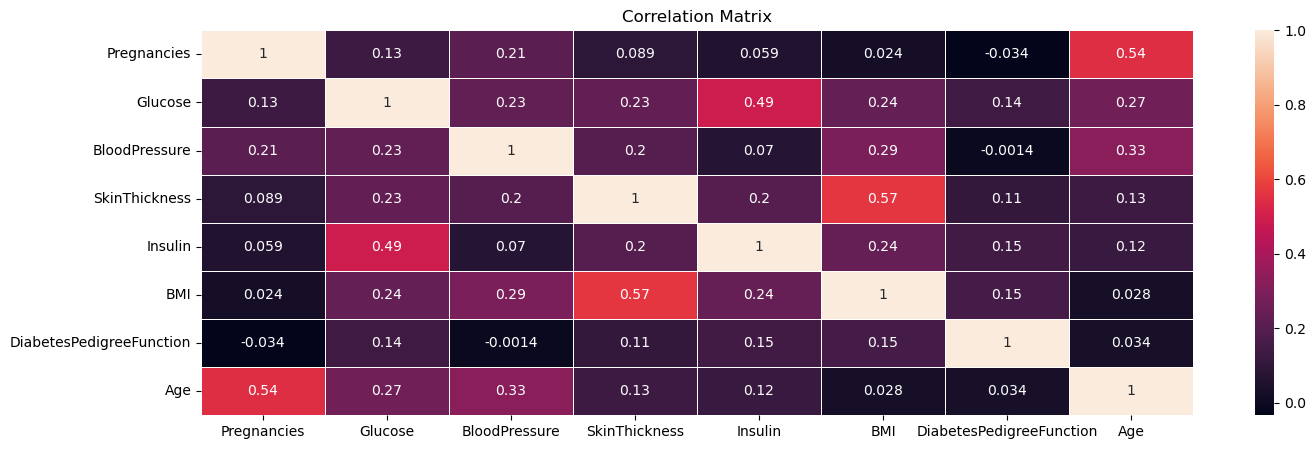

In [14]:
corrMatrix = data.iloc[:,0:8].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

From correlation matrix we see that there is a high correlation between Age and Pregnancies (0.54), Insulin and Glucose (0.49) as well as BMI and SkinThickness (0.57). Let's see how these parameters look on a scatter plot.

In [15]:
# prepare data also for next plotting area
xlims, ylims = [(10, 90), (40, 220), (0, 100)], [(0, 20), (0, 900), (10, 70)]
xvals, yvals = ['Age', 'Glucose', 'SkinThickness'], ['Pregnancies', 'Insulin', 'BMI']

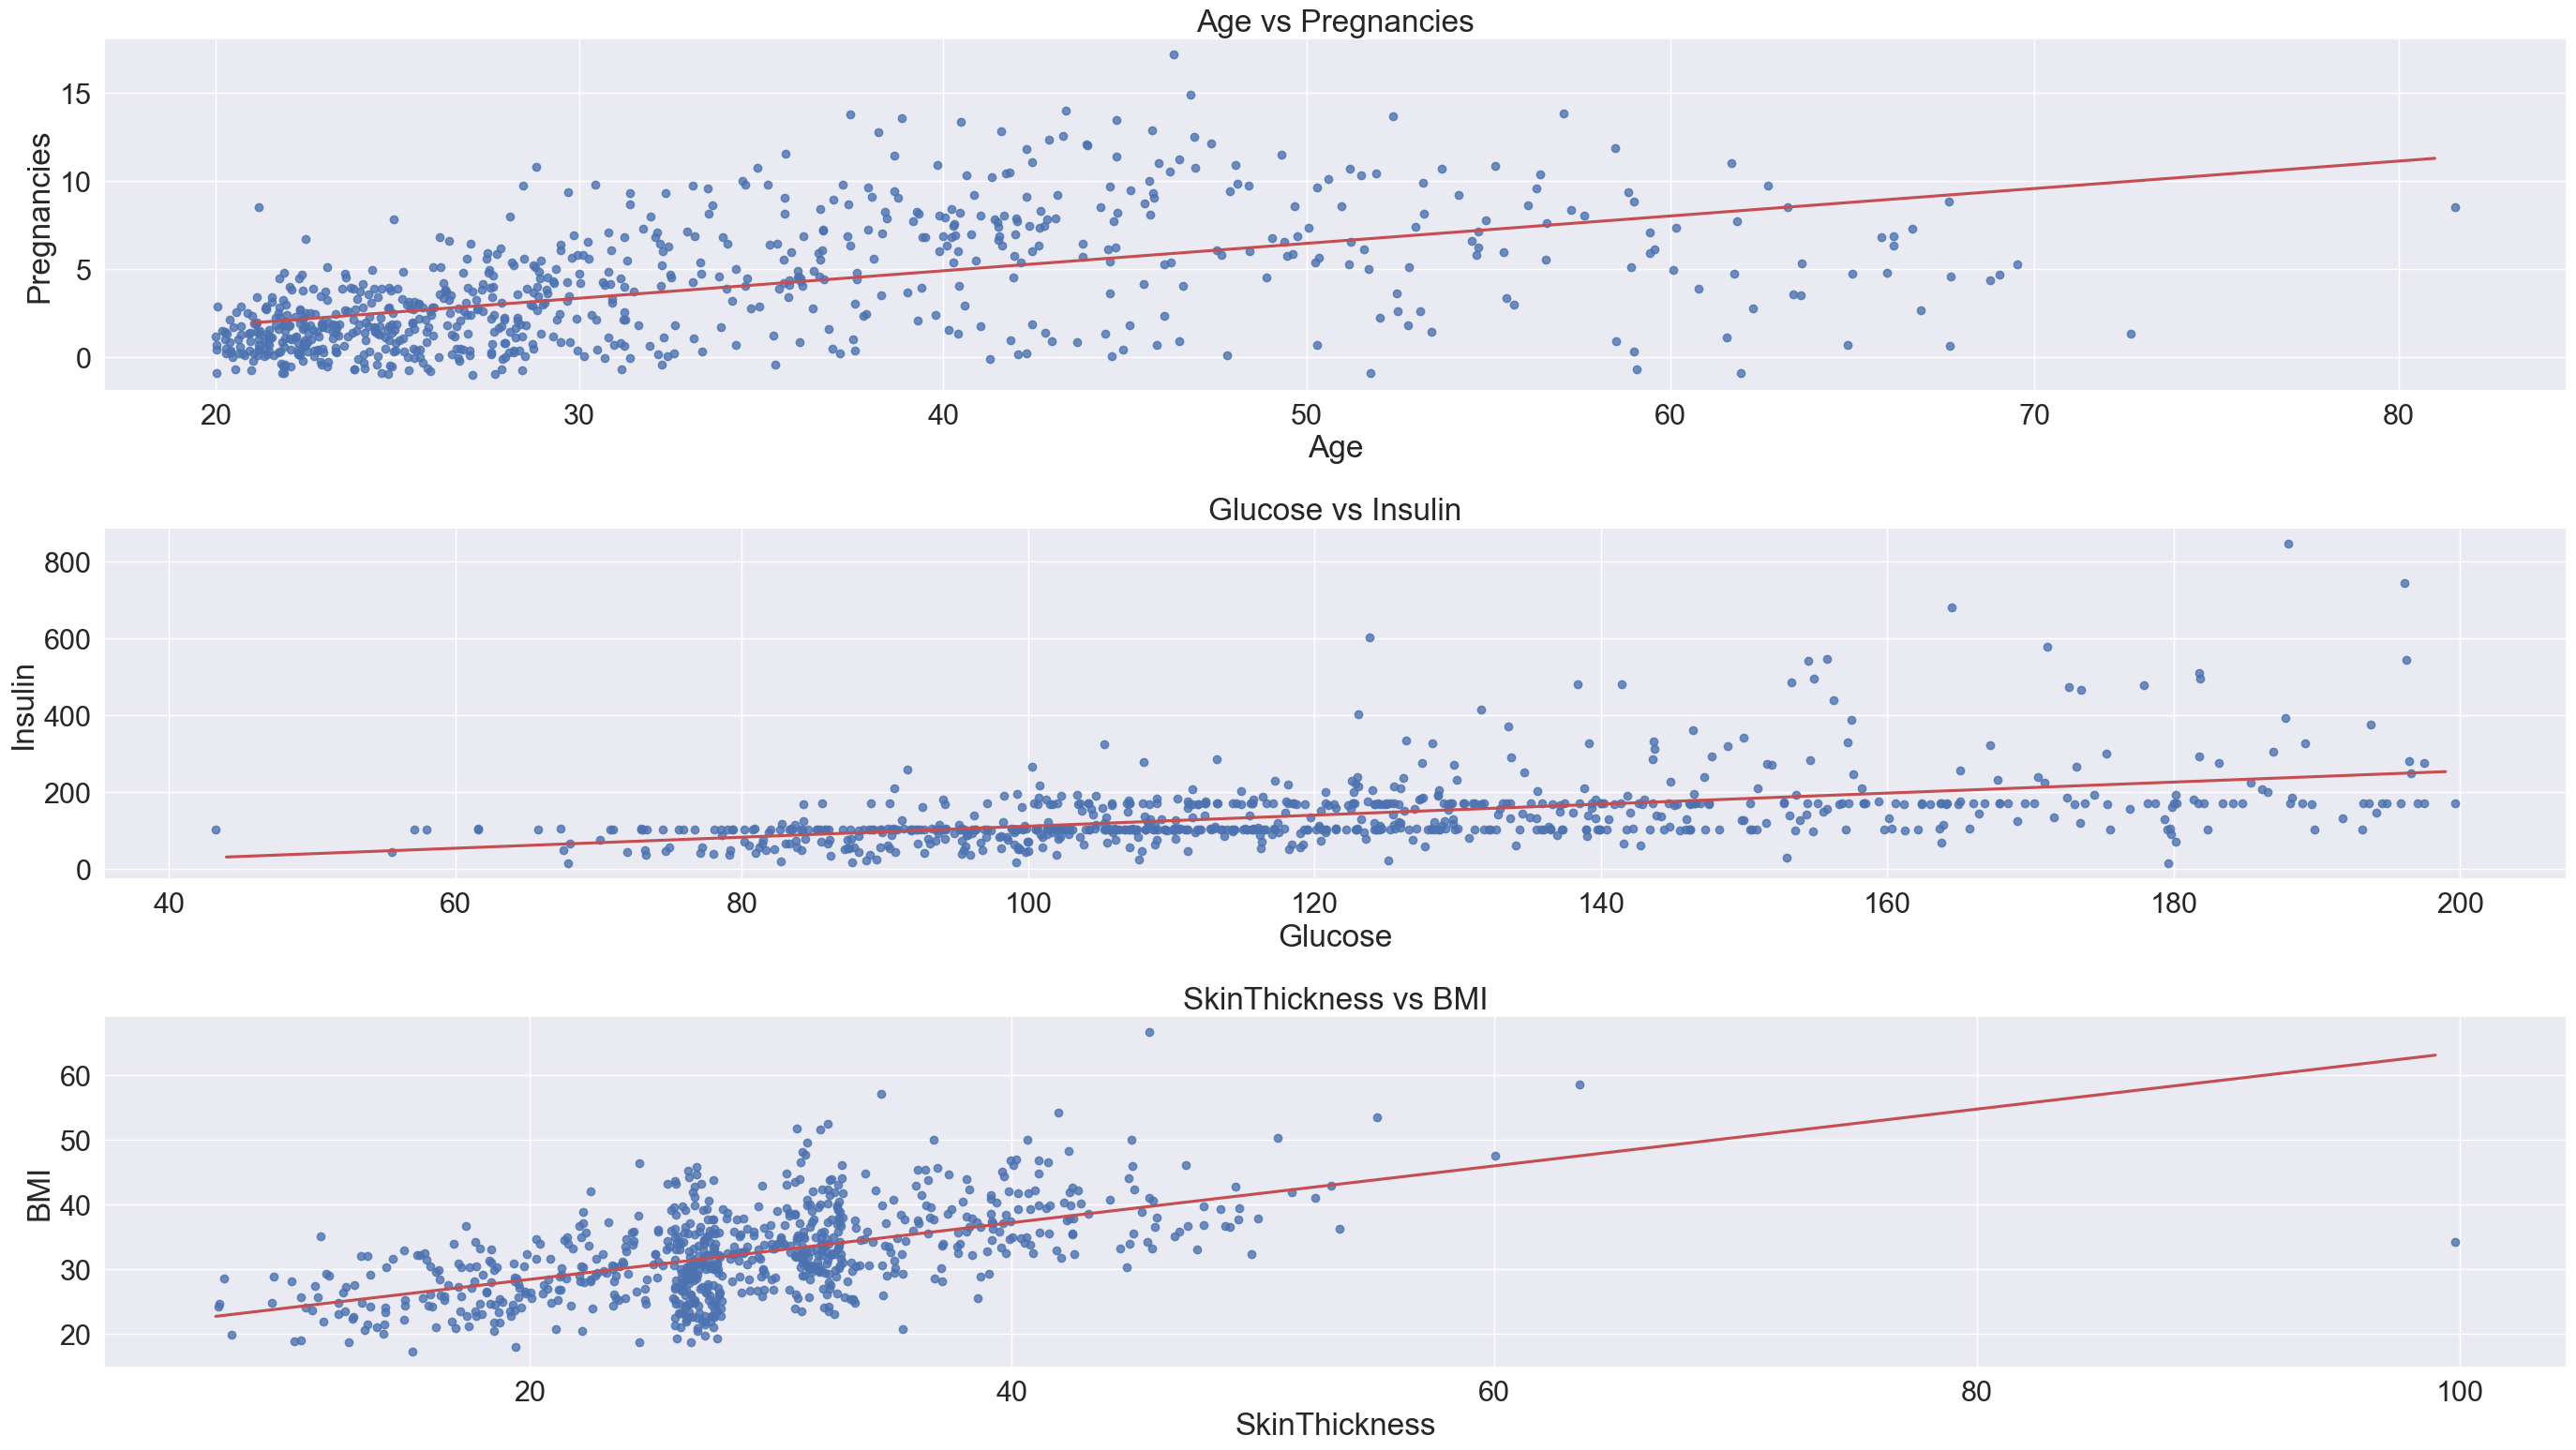

In [16]:
# prepare visualization
sns.set(style='darkgrid', font_scale=2)

fig, axes = plt.subplots(3, figsize=(28,16))
for ax, xval, yval in zip(axes, xvals, yvals):
    sns.regplot(data=data, x=xval, y=yval, ax=ax, x_jitter=True, y_jitter=True, ci=None, line_kws={'color': 'r'})
    ax.set_title(''.join([xval, ' vs ', yval])) 

fig.tight_layout() 
plt.show()

Maybe it will be good to see the scatter plots for each outcome separately. 

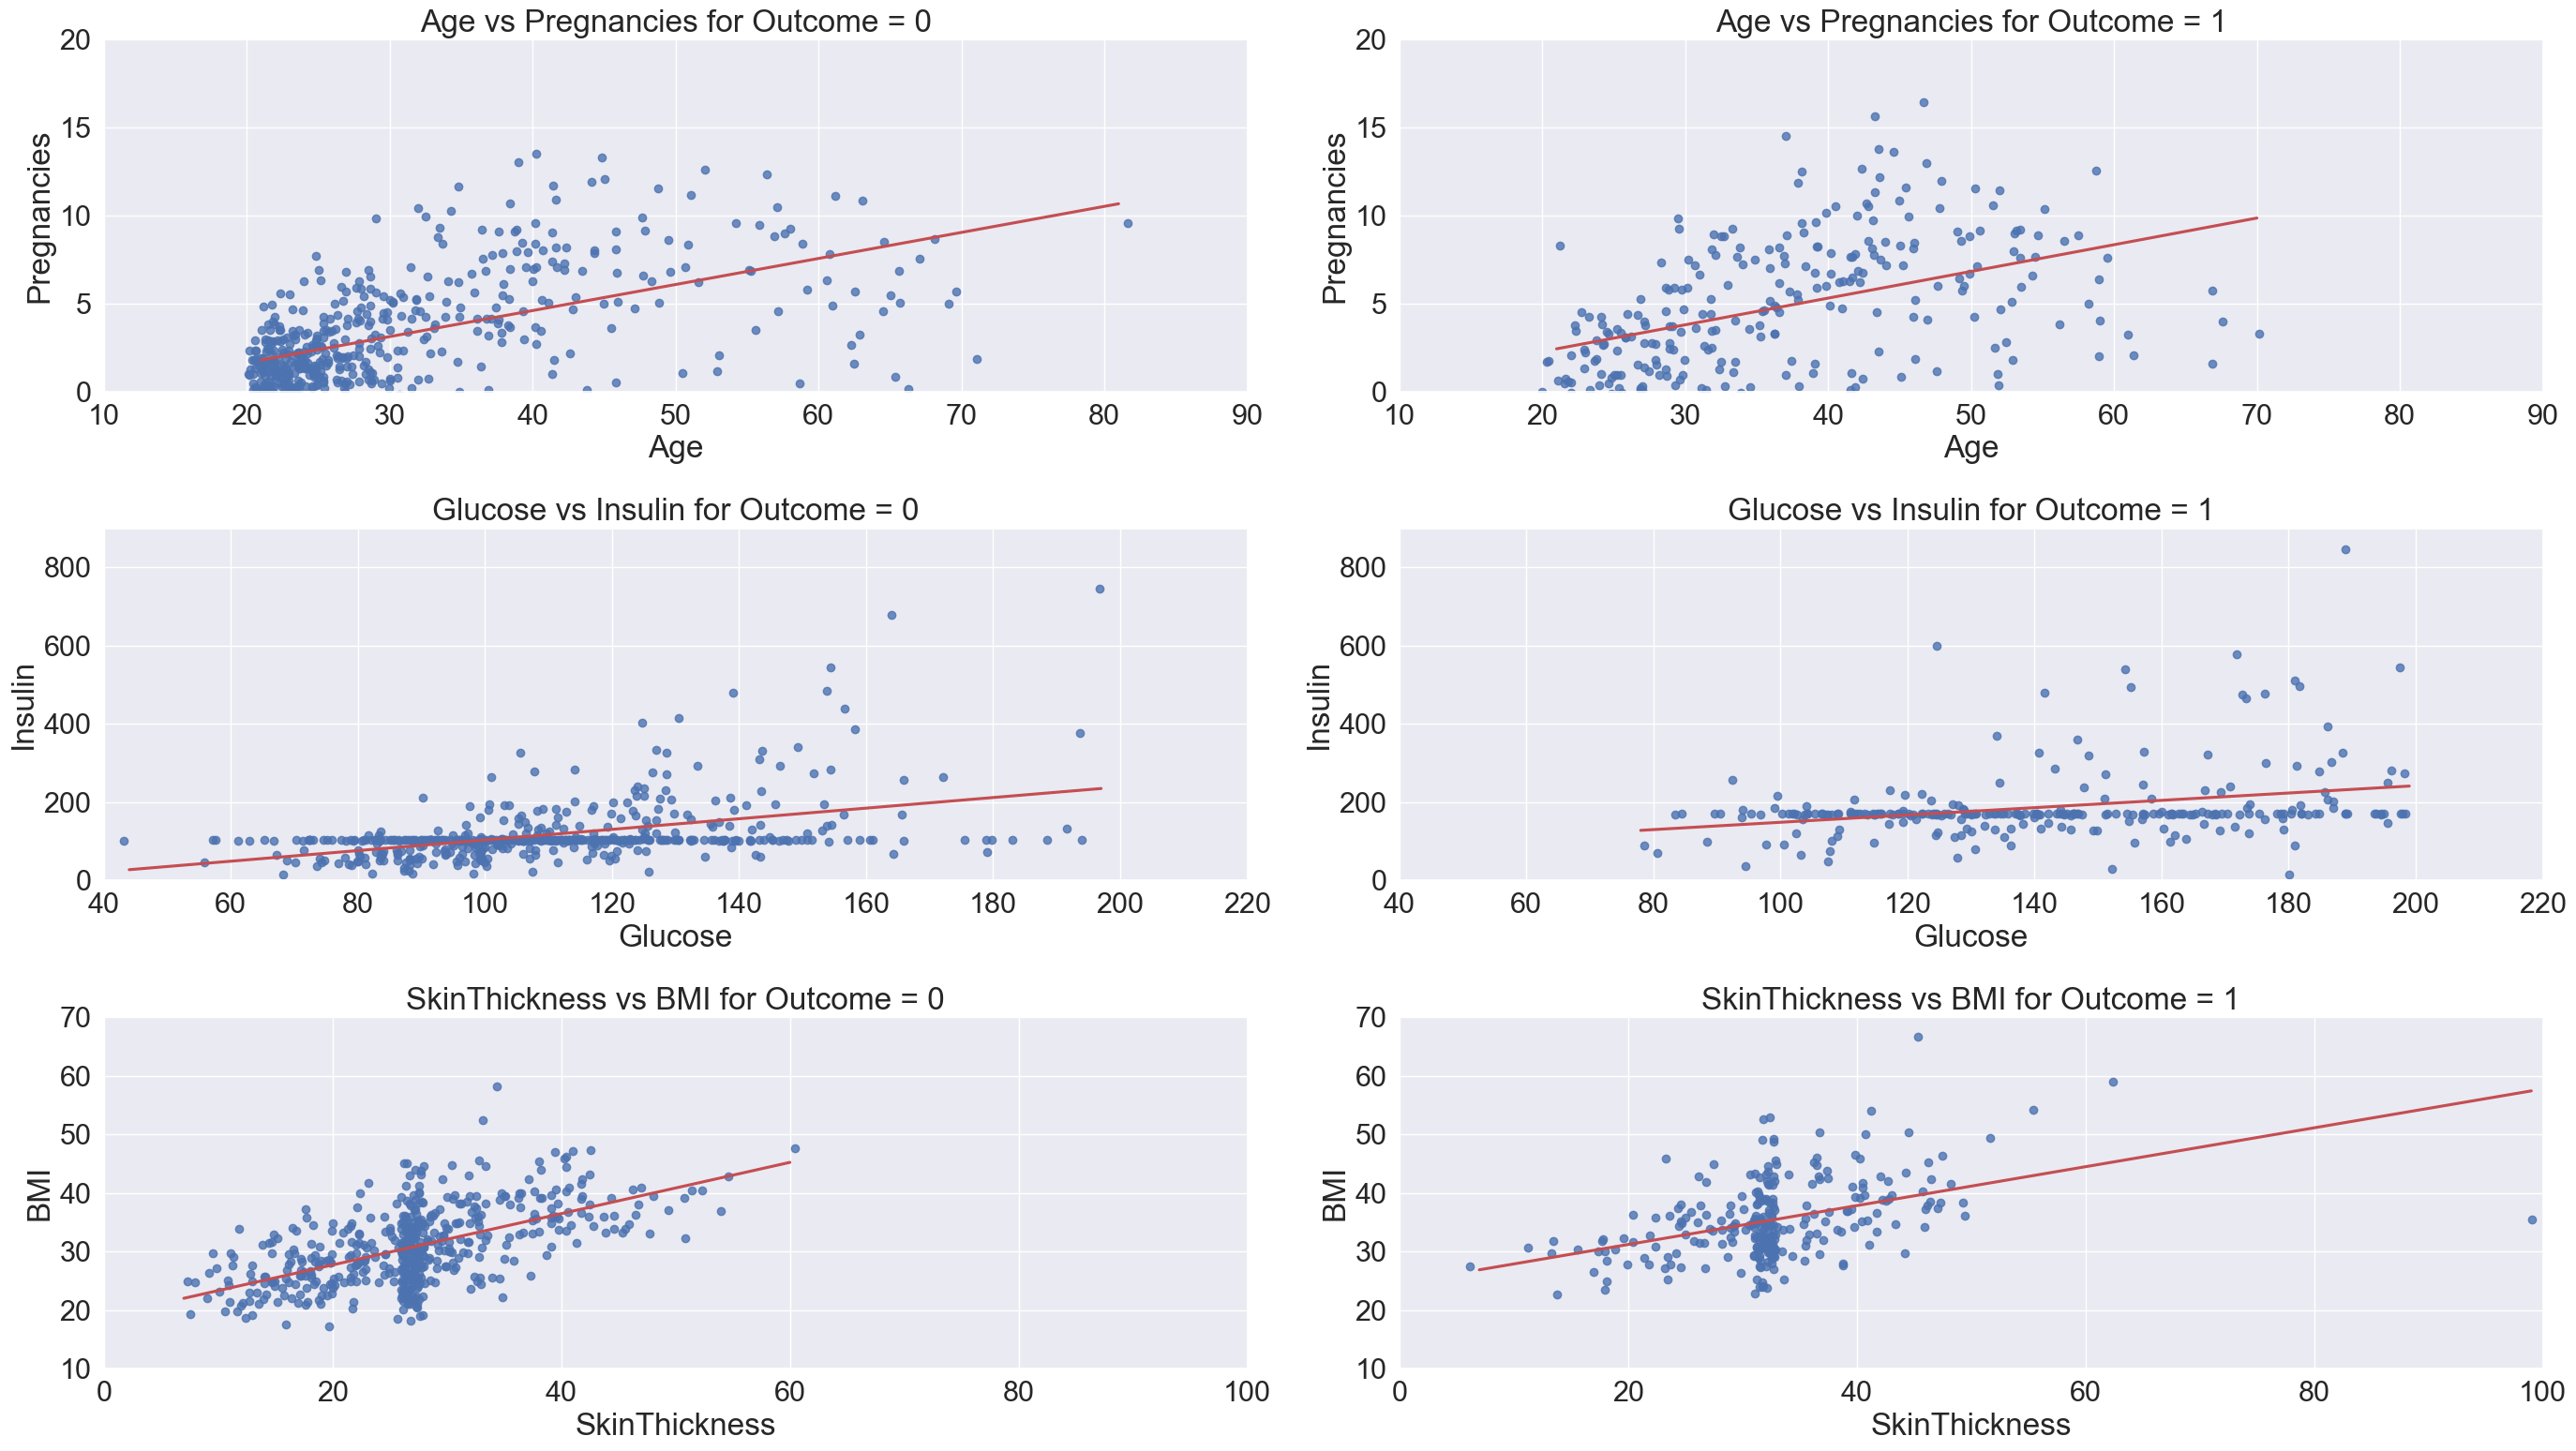

In [17]:
# prepare visualization 
sns.set(style='darkgrid', font_scale=2)

fig, axes = plt.subplots(3, 2, figsize=(28,16))
for row, xval, yval, xlim, ylim in zip(axes, xvals, yvals, xlims, ylims):
    for ax, outcome in zip(row, range(2)):
        sns.regplot(data=data[data['Outcome'] == outcome], x=xval, y=yval, ax=ax, x_jitter=True, y_jitter=True, ci=None, line_kws={'color': 'r'})
        ax.set_title(' '.join([xval, 'vs', yval, 'for Outcome =', str(outcome)]))
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)

fig.tight_layout() 
plt.show()

We can see also data distribution for each parameter and how it is different for Outcome = 0 from data distribution for Outcome = 1. I will use violinplot to see the distribution.

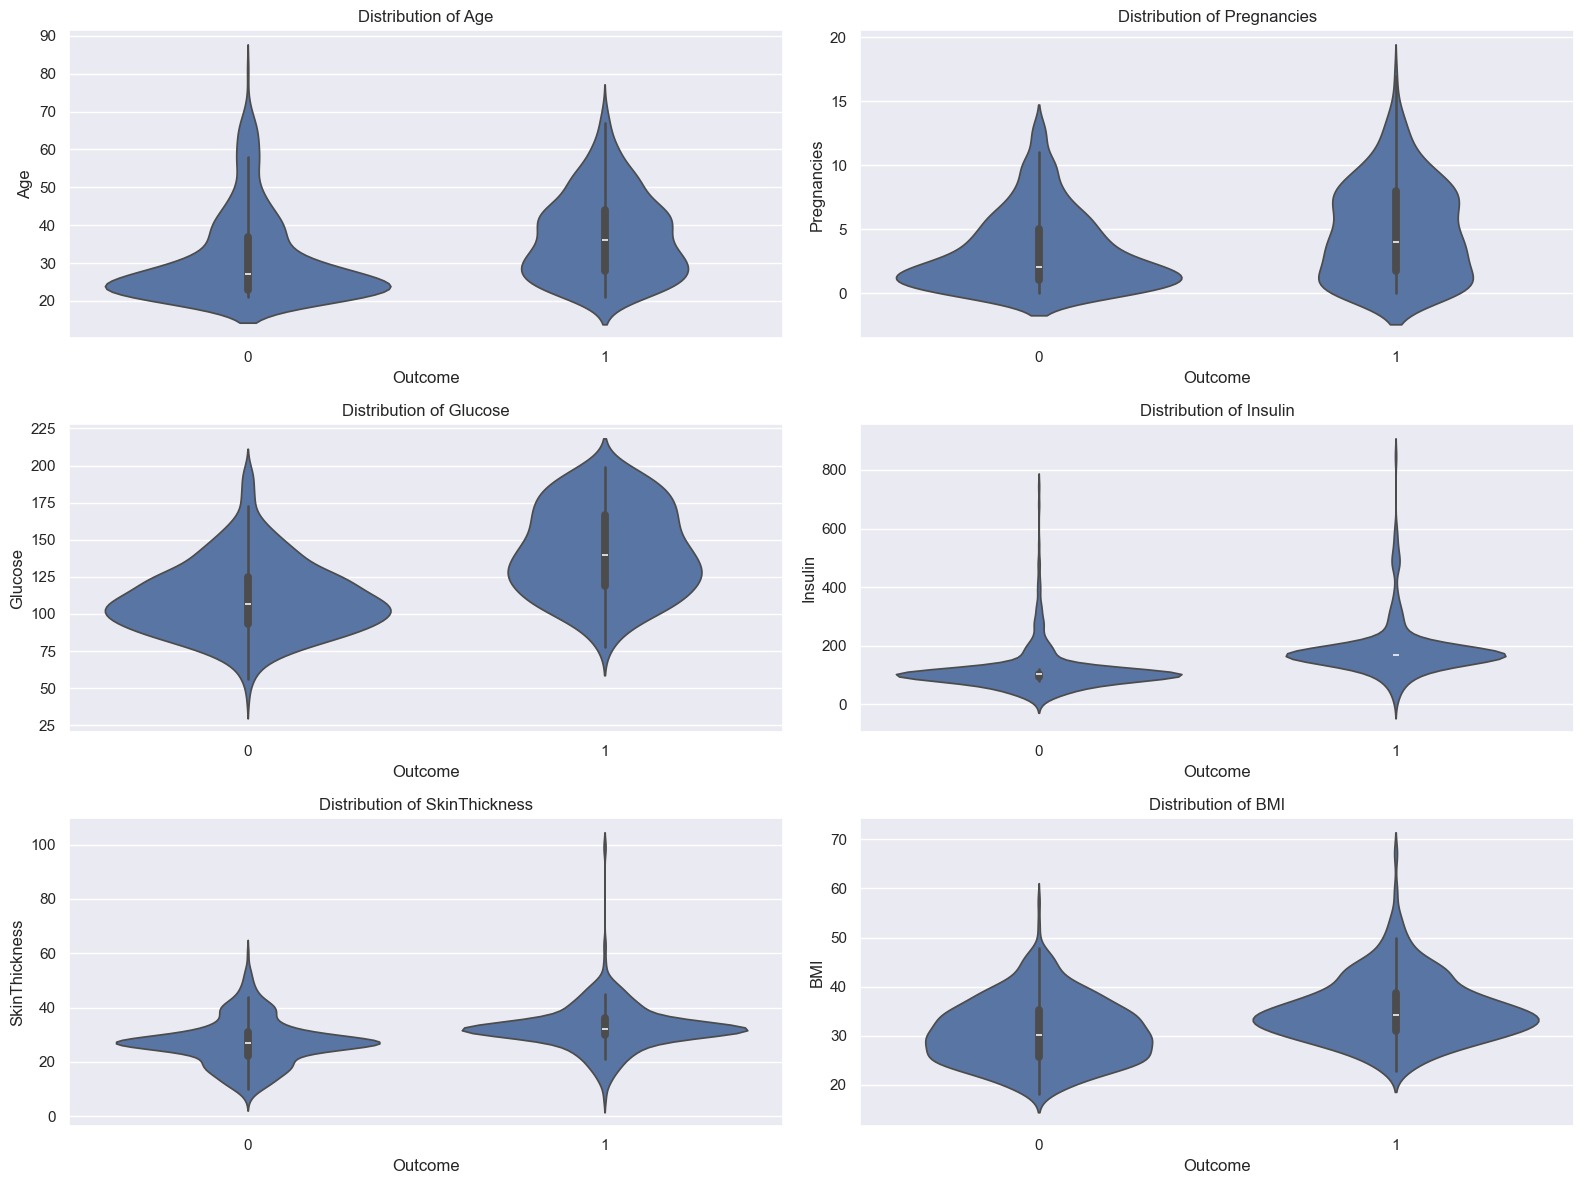

In [18]:
sns.set(style='darkgrid', font_scale=1)

fig, axes = plt.subplots(3, 2, figsize=(16,12))
for row, xval, yval in zip(axes, xvals, yvals):
    sns.violinplot(data=data, y=xval, x='Outcome', ax=row[0])
    row[0].set_title(' '.join(['Distribution of', xval]))
    sns.violinplot(data=data, y=yval, x='Outcome', ax=row[1])
    row[1].set_title(' '.join(['Distribution of', yval]))

fig.tight_layout() 
plt.show()

Remember that I inserted median of parameters for according output so it may disturb the distributions. Nevertheless it is clear that data for outcome=1 in each case has slightly moved up distribution (higher values). By intuition, it seems legit that if a person has higher glucose, insuline, skin thickness or BMI, he/she is more likely to have diabetes. 

No model saw this data, this was only for my use to see the distributions. 

## Visualizations for dataset which excluded NaNs

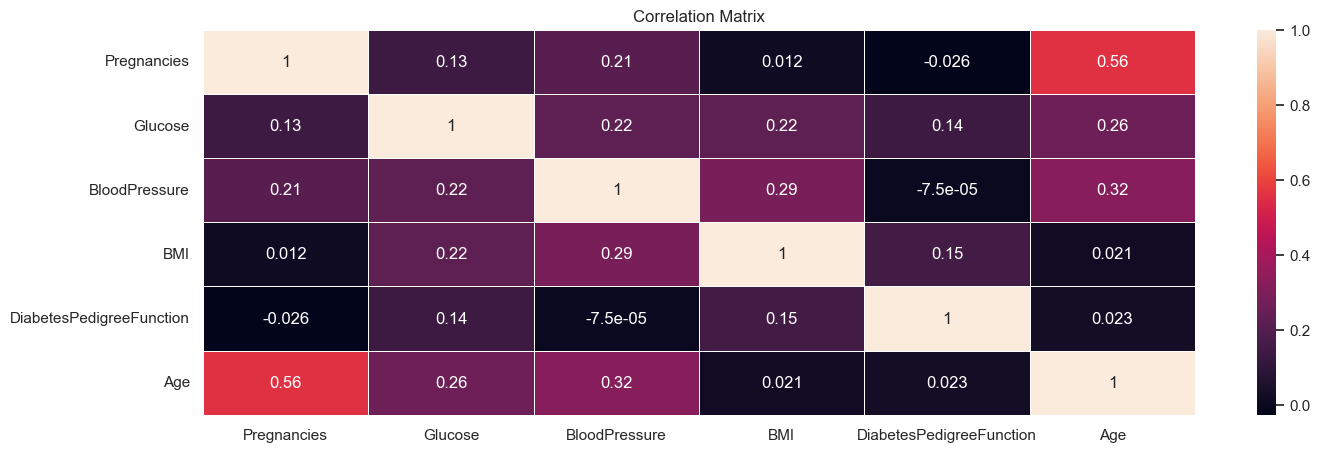

In [19]:
corrMatrix = data_no_nans.iloc[:,0:6].corr()
plt.figure(figsize = (16,5))
sns.heatmap(corrMatrix, annot=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

For dataset with NaNs exluded there is only one strong correlation - between Pregnancies and Age columns.

In [20]:
# prepare data also for next plotting area
xlims, ylims = [(10, 90), (10, 90), (0, 150)], [(0, 20), (0, 150), (10, 70)]
xvals, yvals = ['Age', 'Age', 'BloodPressure'], ['Pregnancies', 'BloodPressure', 'BMI']

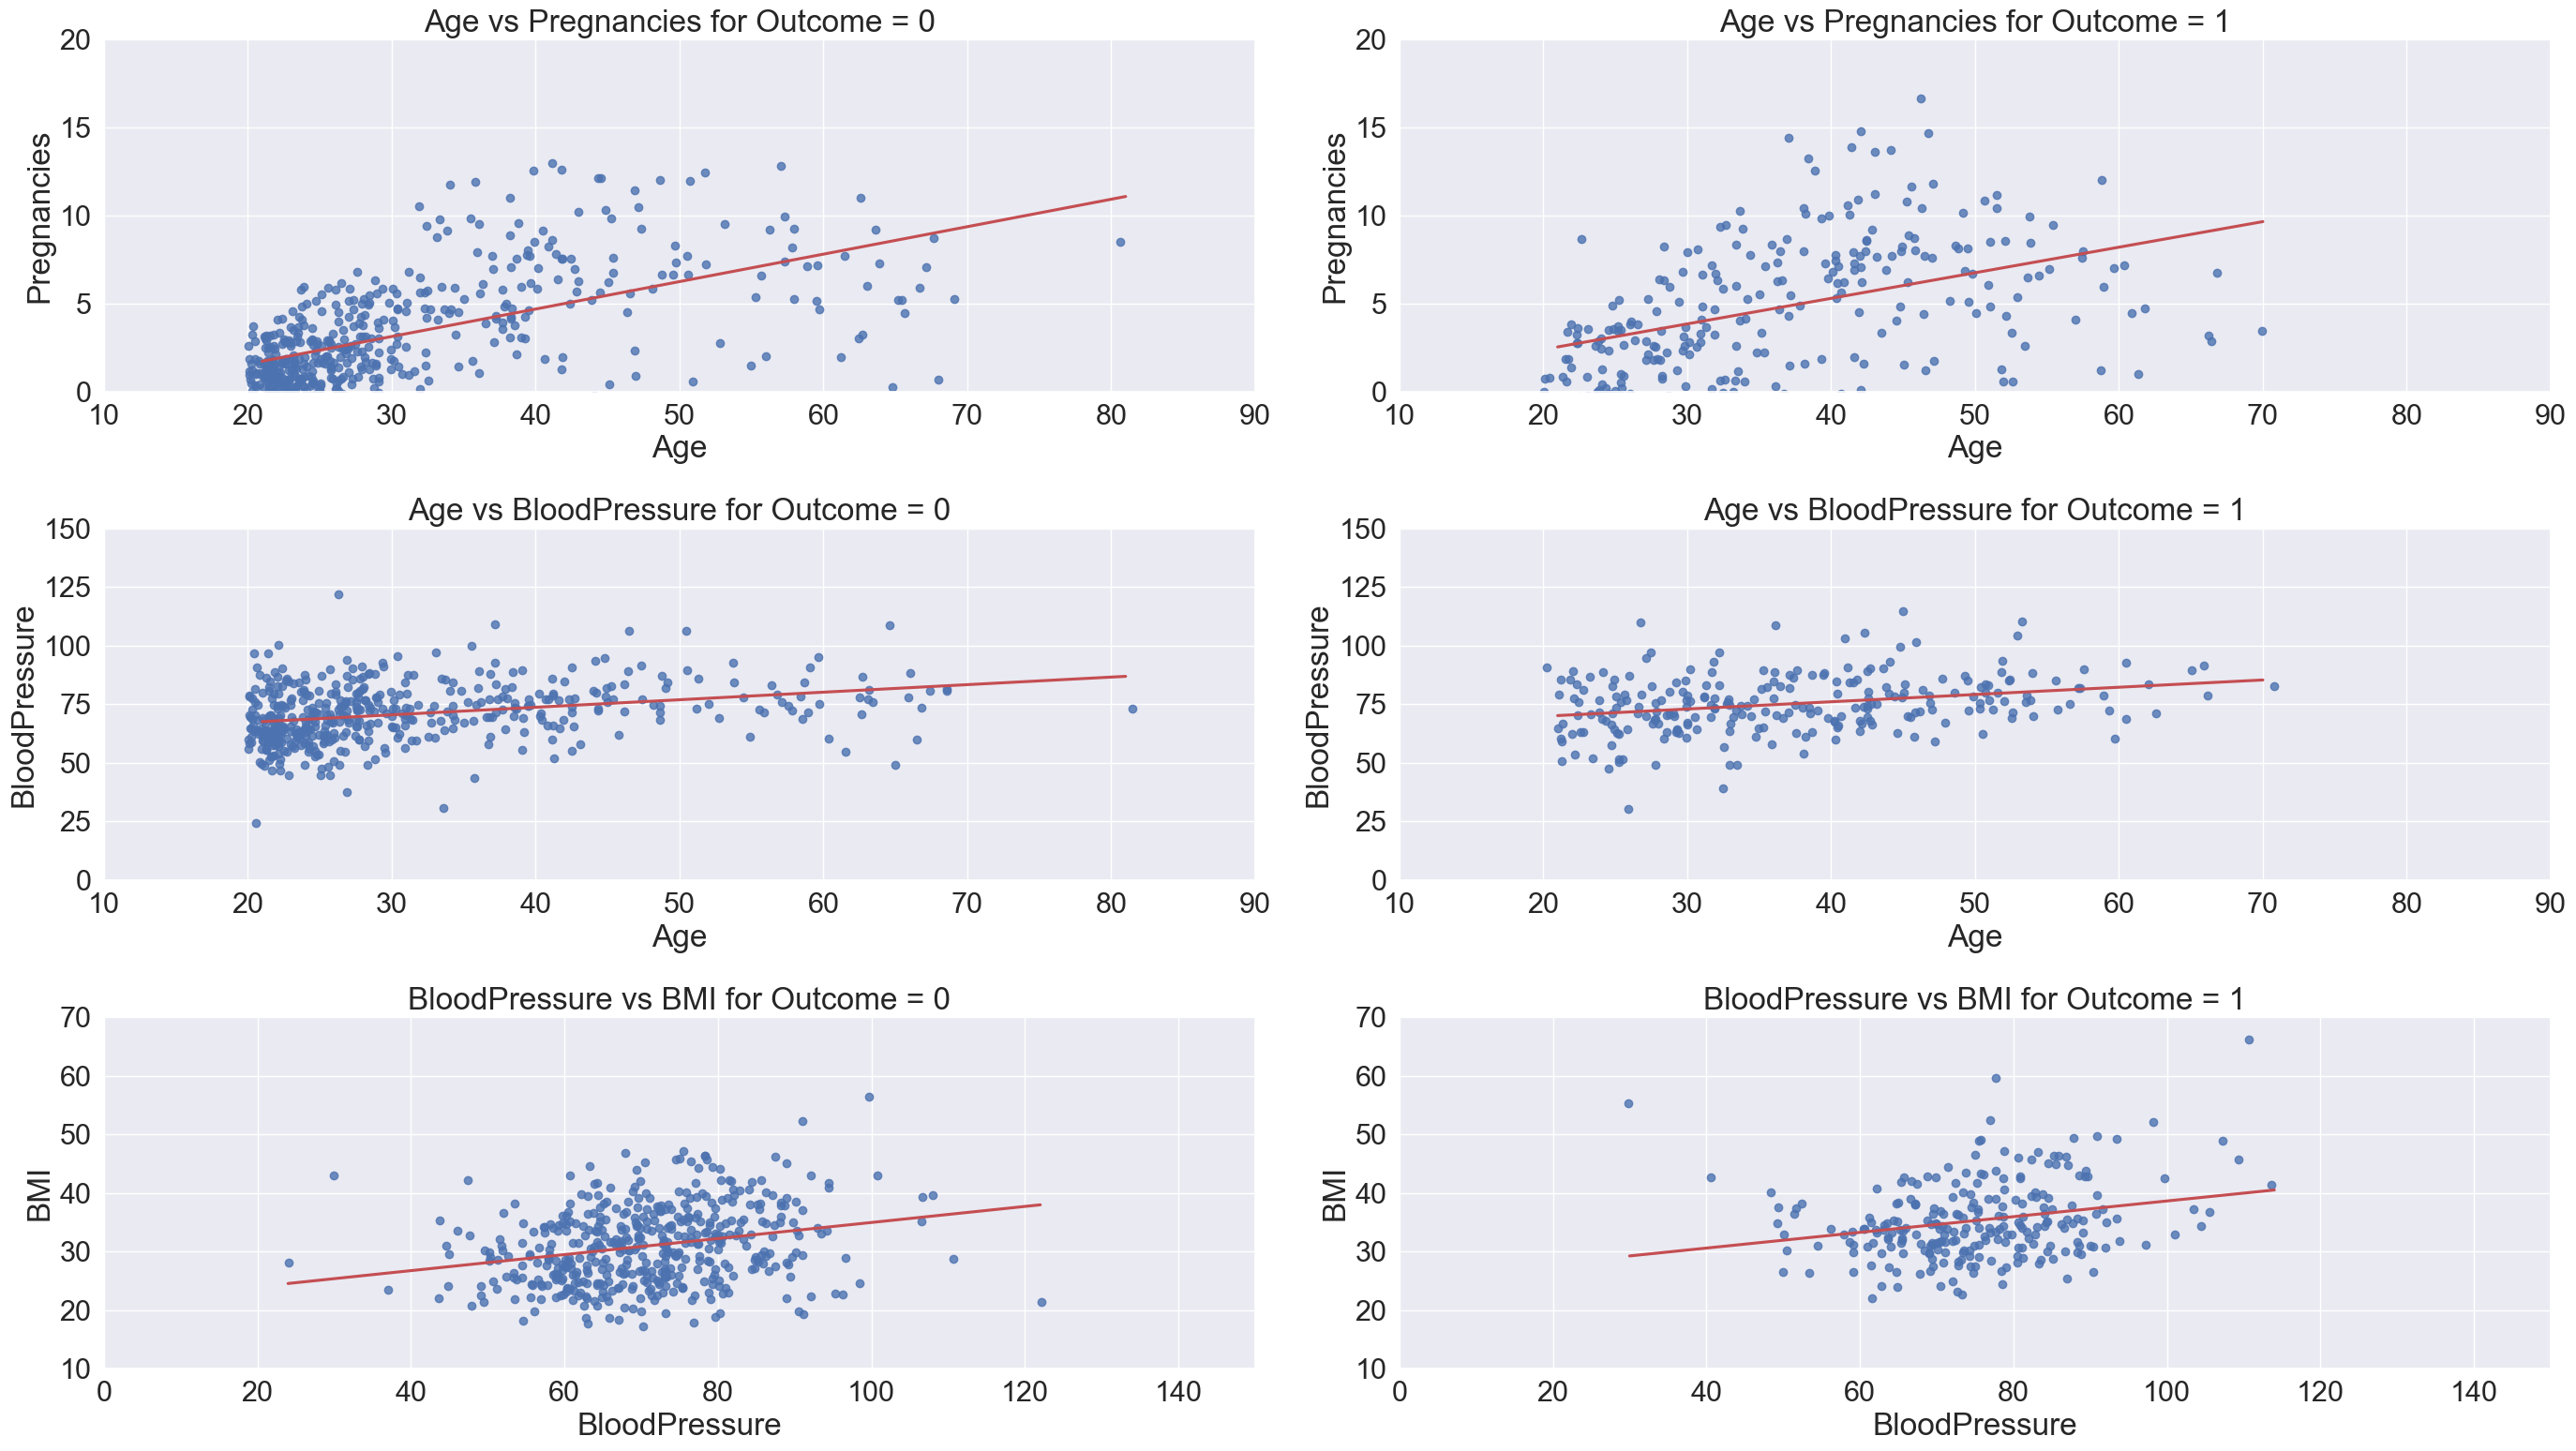

In [21]:
# prepare visualization 
sns.set(style='darkgrid', font_scale=2)

fig, axes = plt.subplots(3, 2, figsize=(28,16))
for row, xval, yval, xlim, ylim in zip(axes, xvals, yvals, xlims, ylims):
    for ax, outcome in zip(row, range(2)):
        sns.regplot(data=data_no_nans[data_no_nans['Outcome'] == outcome], 
                    x=xval, y=yval, ax=ax, x_jitter=True, y_jitter=True, ci=None, line_kws={'color': 'r'})
        ax.set_title(' '.join([xval, 'vs', yval, 'for Outcome =', str(outcome)]))
        ax.set_xlim(*xlim)
        ax.set_ylim(*ylim)

fig.tight_layout() 
plt.show()

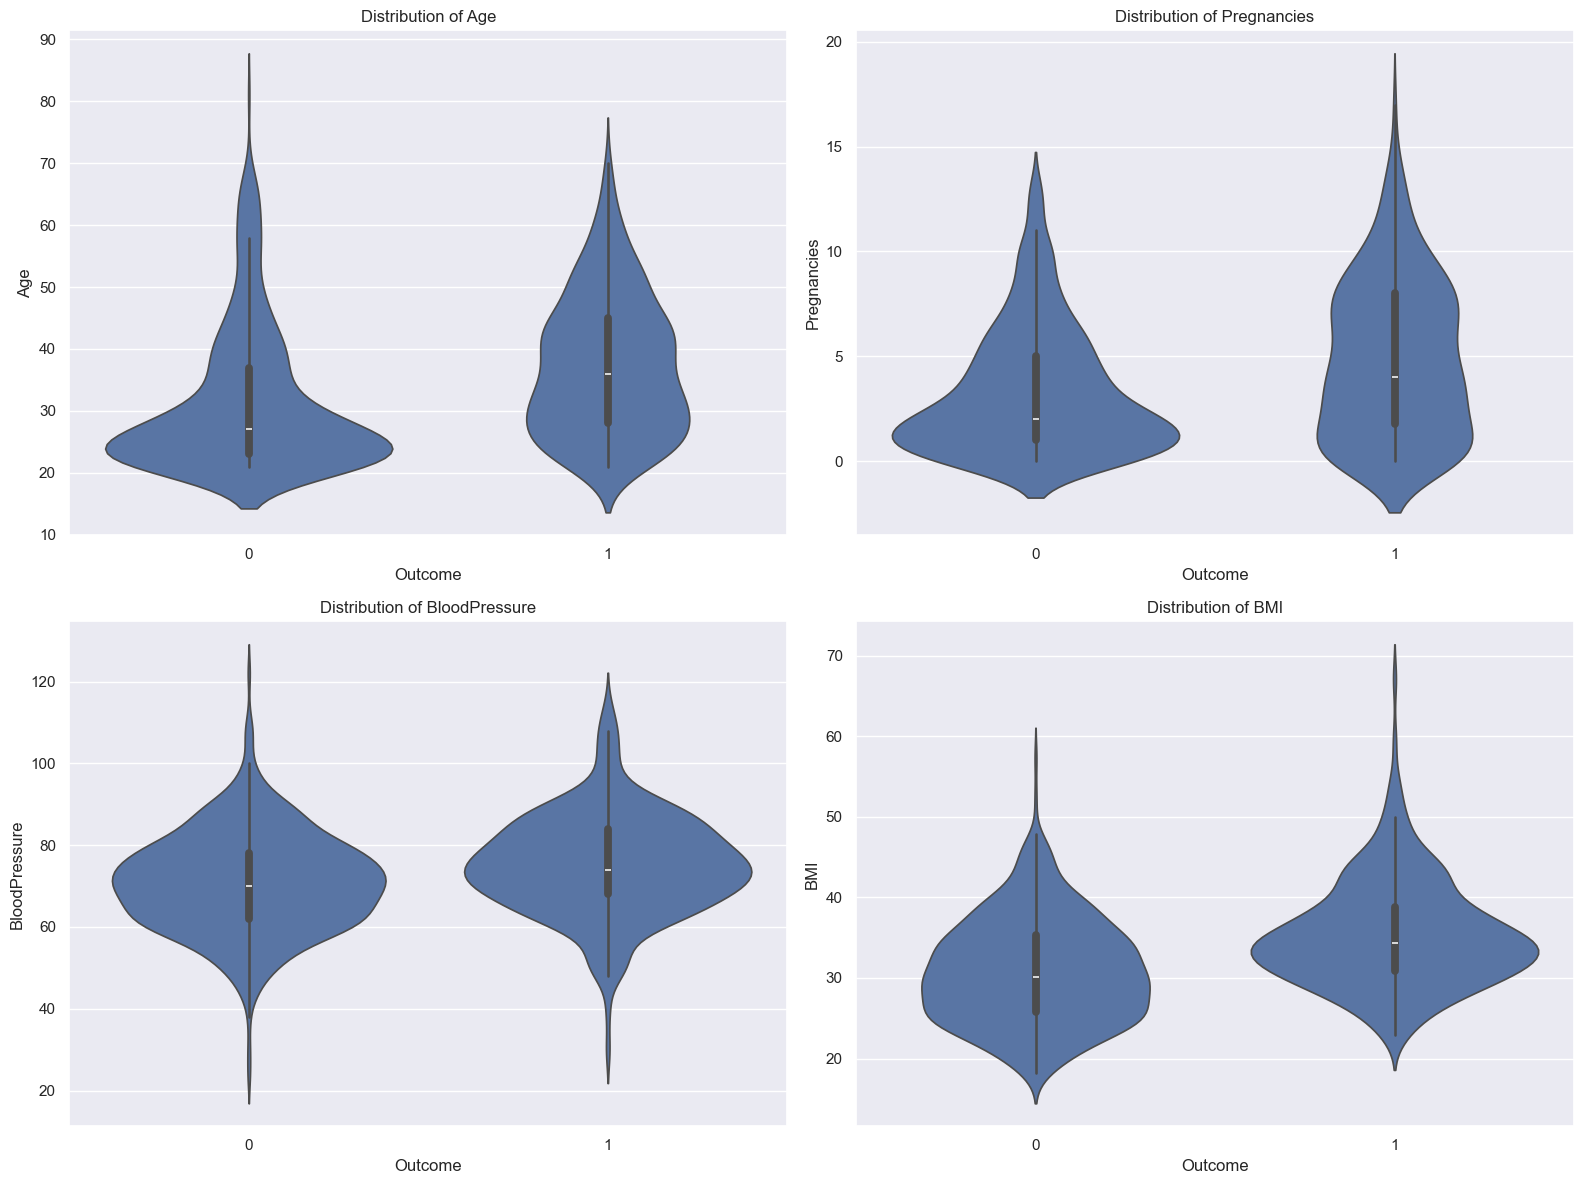

In [22]:
sns.set(style='darkgrid', font_scale=1)

fig, axes = plt.subplots(2, 2, figsize=(16,12))
for row, xval, yval in zip(axes, xvals[0::2], yvals[0::2]):
    sns.violinplot(data=data_no_nans, y=xval, x='Outcome', ax=row[0])
    row[0].set_title(' '.join(['Distribution of', xval]))
    sns.violinplot(data=data, y=yval, x='Outcome', ax=row[1])
    row[1].set_title(' '.join(['Distribution of', yval]))

fig.tight_layout() 
plt.show()

Conclusions are same as for dataset with NaN replaced by medians.

## Conclusion for visualizations

There is a difference in distributions of BMI, skin thickness, glucose and insuline when outcome differs. 

Now let's create some models and look for best suited ones.

# Creating a model

As we have two datasets - one with NaN's changed to medians and second one which excluded NaN's values, for each of them I will make models for KNN for different k's to find best k, decision tree to check if it is a good algorithm for this task and as well a k-means model to check if an unsupervised machine learning algorithm will divide data same way the real outcome does. Each algorithm will be done in two datasets prepared above. So this is the test I would like to make:
1. dataset with NaN = median - KNN
2. dataset with NaN = median - decision tree
3. dataset with NaN = median - k-means
4. dataset without NaNs - KNN
5. dataset without NaNs - decision tree
6. dataset without NaNs - k-means

Afterwards, I will make a comparison between those models and check which one had best results.

Now I will divide data into test and train set to train models and test its accuracy. So the next steps are:
* create train and test data (for two datasets)
* normalize the train data (for two datasets)
* fit a classification / clustering model (for 6 models shown above)
* normalize test data (for 6 models shown above)
* test given model and check its accuracy (for 6 models shown above)

In [23]:
# import needed libraries form sklearn

# preprocessing to normalize the data
from sklearn import preprocessing

# test_train_split
from sklearn.model_selection import train_test_split

# K-neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# unsupervised kmeans classifier
from sklearn.cluster import KMeans

# metrics to check how accurate is the model
from sklearn import metrics

## Normalize the data

In [24]:
# normalize the data
X = data[['Pregnancies', 'Glucose', 
          'BloodPressure', 'SkinThickness', 
          'Insulin', 'BMI', 
          'DiabetesPedigreeFunction', 'Age']]
y = data['Outcome']
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

## Divide the data in parts for training and testing 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (537, 8) (537,)
Test set: (231, 8) (231,)


## First training for the model

In [44]:
k = 4
# Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
print(yhat)

[1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 0 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0
 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 0 0 0 0]


## Accuracy for the first model (k = 4)

In [45]:
print("Train set Accuracy: " + str(round(100 * metrics.accuracy_score(y_train, neigh.predict(X_train)), 2)) + "%")
print("Test set Accuracy:  " + str(round(100 * metrics.accuracy_score(y_test, yhat), 2)) + "%")

Train set Accuracy: 86.22%
Test set Accuracy:  81.39%


## Testing accuracy for different k

In [46]:
Ks = 30
mean_acc = np.zeros(Ks - 1)
std_acc = np.zeros(Ks - 1)

for n in range(1,Ks):
    # Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = round(100 * metrics.accuracy_score(y_test, yhat), 2)
    std_acc[n-1] = round(100 * np.std(yhat==y_test)/np.sqrt(yhat.shape[0]), 2)

print(mean_acc)
print(std_acc)

[75.32 78.35 79.65 81.39 81.82 83.98 83.12 82.68 83.12 83.12 82.25 83.98
 83.12 84.85 83.12 85.28 84.85 85.71 84.85 84.85 82.68 82.68 82.68 82.68
 82.68 82.68 82.25 82.68 82.25]
[2.84 2.71 2.65 2.56 2.54 2.41 2.46 2.49 2.46 2.46 2.51 2.41 2.46 2.36
 2.46 2.33 2.36 2.3  2.36 2.36 2.49 2.49 2.49 2.49 2.49 2.49 2.51 2.49
 2.51]


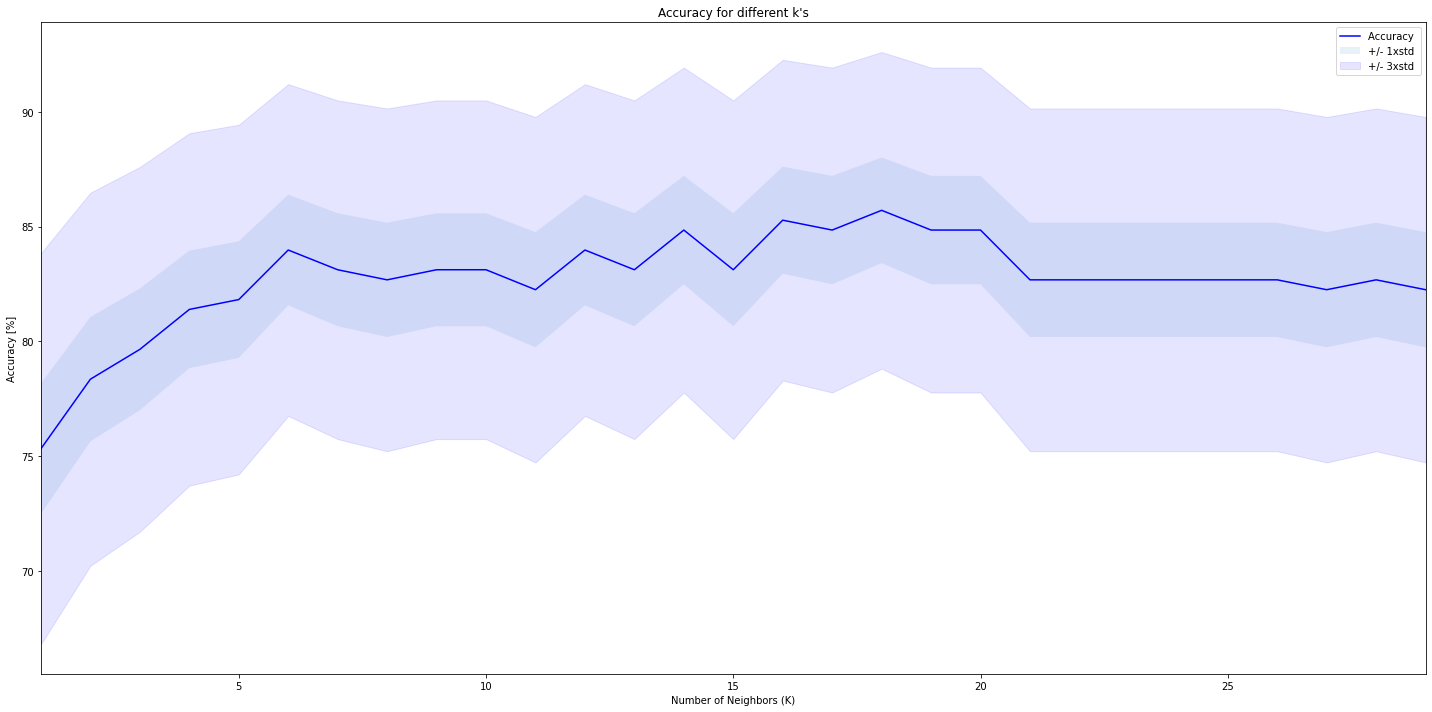

In [47]:
plt.figure(figsize=(20,10))
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks), mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks), mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10, color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy [%]')
plt.xlabel('Number of Neighbors (K)')
plt.xlim(1, Ks - 1)
plt.title("Accuracy for different k's")
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was " + str(mean_acc.max()) + "% for k = " + str(mean_acc.argmax() + 1) + ".") 

The best accuracy was 85.71% for k = 18.


# Conclusion

I managed to build a model with accuracy > 80%. The source of the model is k-neighbors algorithm. Best accuracy for test data was for k = 18. 